# Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Problem Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import style
style.use("fivethirtyeight")

## Load Data

In [3]:
df = pd.read_csv('loandata.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# shape of data
df.shape

(614, 13)

- 614 records and 13 features

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- 8 categorical and 5 numerical features

## Hypothesis
- Salary: Applicants with high income should have more chances of loan approval.
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

## Target variable

In [7]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

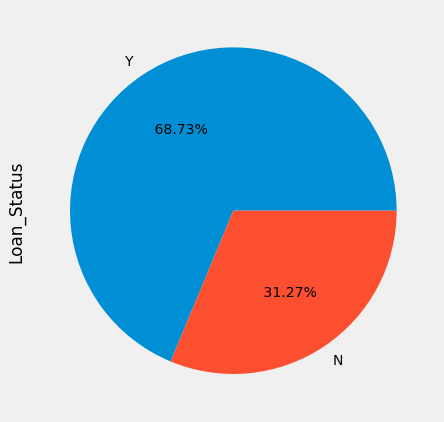

In [8]:
plt.figure(figsize = (7,7))
df["Loan_Status"].value_counts().plot.pie(autopct = '% .2f%%')

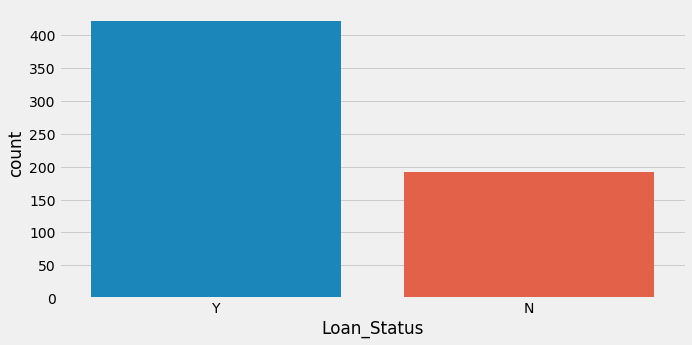

In [9]:
plt.figure(figsize =(10,5))
sns.countplot(df["Loan_Status"])

## Univariate Analysis
- In this we explore each feature individually
- For categorical variables we use frequency tables or bar graphs or pie charts
- For numerical(continuous) variables we use histogram or probability density plots

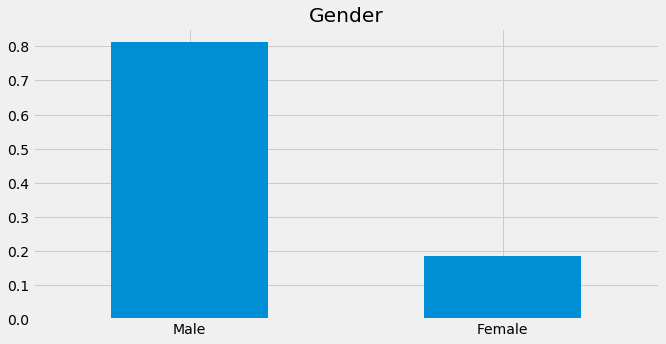

In [10]:
df["Gender"].value_counts(normalize = True).plot.bar(title = "Gender", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

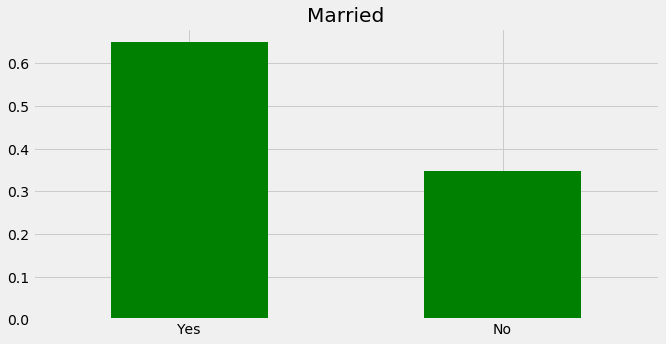

In [11]:
df["Married"].value_counts(normalize = True).plot.bar(title = "Married", figsize = (10, 5), color = 'g')
plt.xticks(rotation = 0)
plt.show()

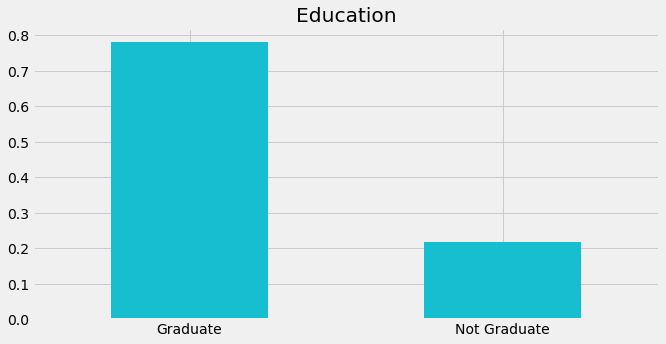

In [12]:
df["Education"].value_counts(normalize = True).plot.bar(title = "Education", figsize = (10, 5),color = 'tab:cyan')
plt.xticks(rotation = 0)
plt.show()

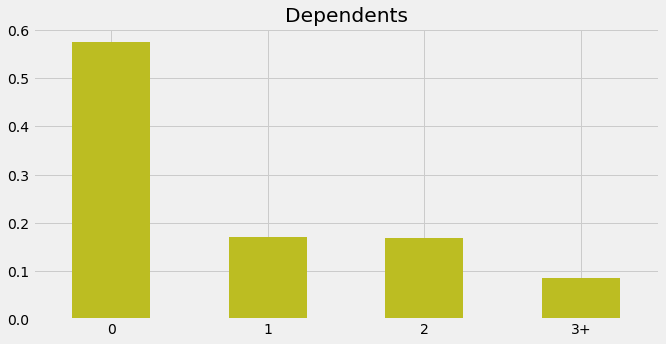

In [13]:
df["Dependents"].value_counts(normalize = True).plot.bar(color = "tab:olive",title = "Dependents",figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

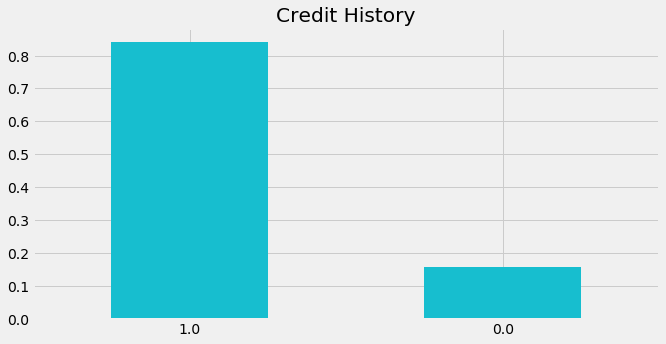

In [14]:
df["Credit_History"].value_counts(normalize = True).plot.bar(color= "tab:cyan", title = "Credit History", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

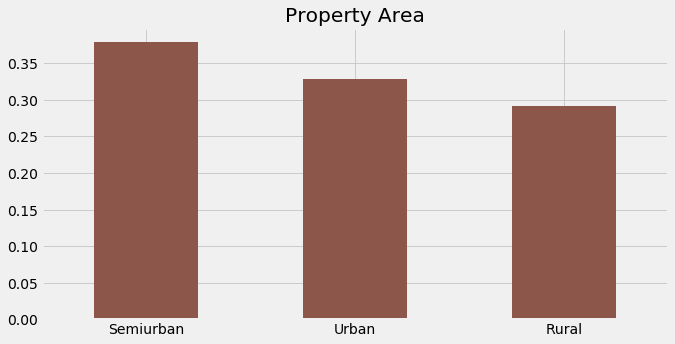

In [15]:
df["Property_Area"].value_counts(normalize = True).plot.bar(color = "tab:brown", title = "Property Area", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

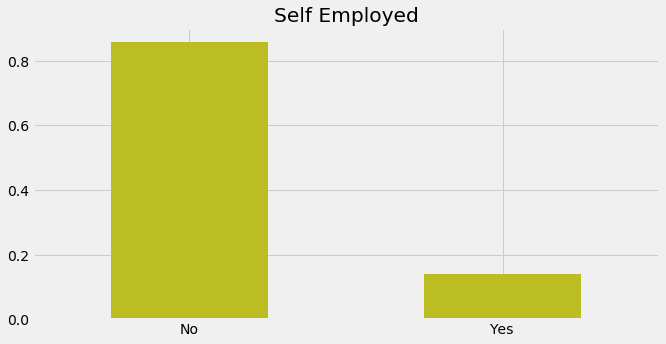

In [16]:
df["Self_Employed"].value_counts(normalize = True).plot.bar(color = "tab:olive", title = "Self Employed", figsize = (10,5))
plt.xticks(rotation = 0)
plt.show()

## Numerical Variables

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- Applicant Income, Co-applicant Income, LoanAmount, Loan_Amount_Term, Credit_History are numerical variables.

###  Applicant Income

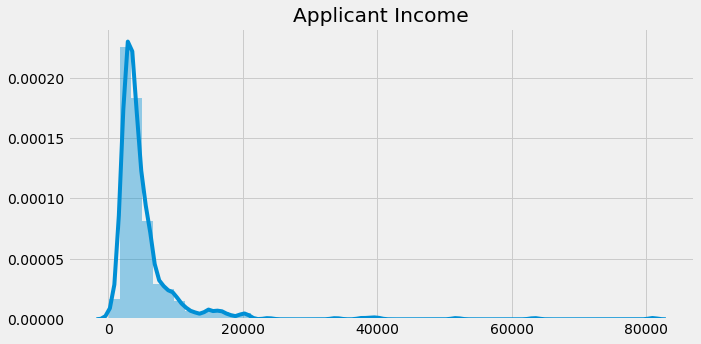

In [18]:
# distlpot
plt.figure(figsize = (10, 5))
plt.title("Applicant Income")
sns.distplot(df["ApplicantIncome"])
plt.xlabel(None)
plt.show()

- It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

In [19]:
# diferential static
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

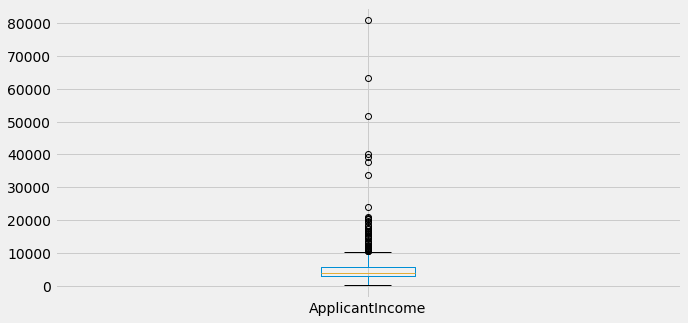

In [20]:
# boxplot
df["ApplicantIncome"].plot.box(figsize = (10, 5))
plt.show()

- The boxplot confirms the presence of a lot of outliers or extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels

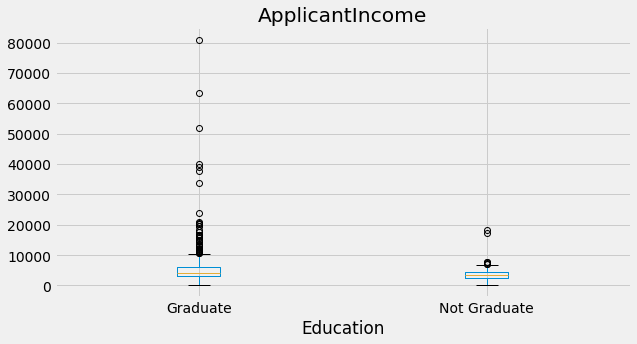

In [21]:
df.boxplot(column = "ApplicantIncome", by = "Education", figsize = (10, 5))
plt.suptitle("")
plt.show()

- We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outlier

### CoApplicantIncome

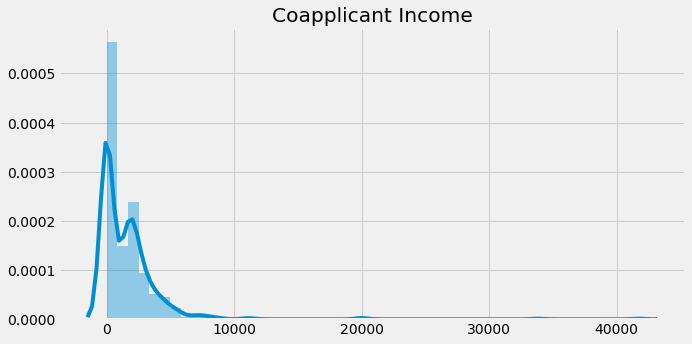

In [22]:
plt.figure(figsize = (10, 5))
plt.title("Coapplicant Income")
sns.distplot(df["CoapplicantIncome"])
plt.xlabel(None)
plt.show()

- We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000.

In [23]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

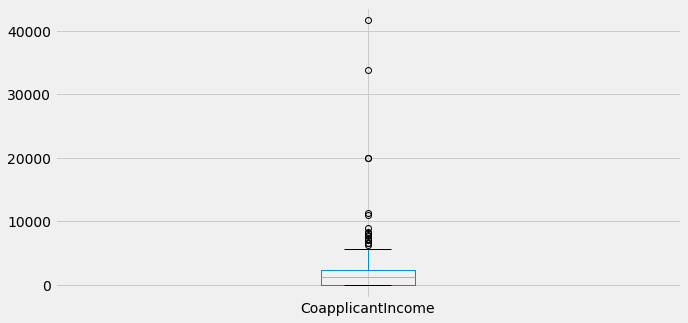

In [24]:
plt.figure(figsize = (10, 5))
df["CoapplicantIncome"].plot.box(figsize = (10, 5))
plt.show()

- Coapplicant income is not normally distributed and we can see a lot of outliers

### Loan Amount

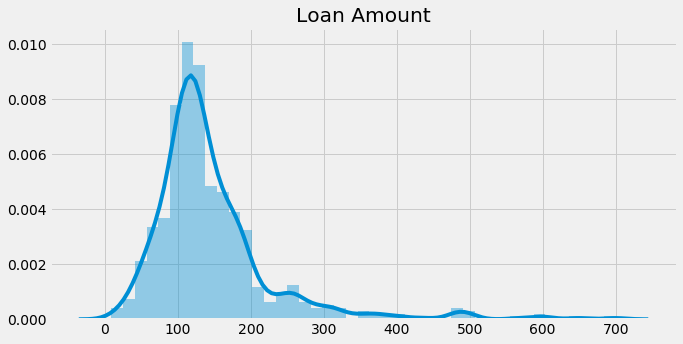

In [25]:
plt.figure(figsize = (10, 5))
plt.title("Loan Amount")
sns.distplot(df["LoanAmount"])
plt.xlabel(None)
plt.show()

- We see a lot of outliers in this variable and the distribution is fairly normal.

In [26]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

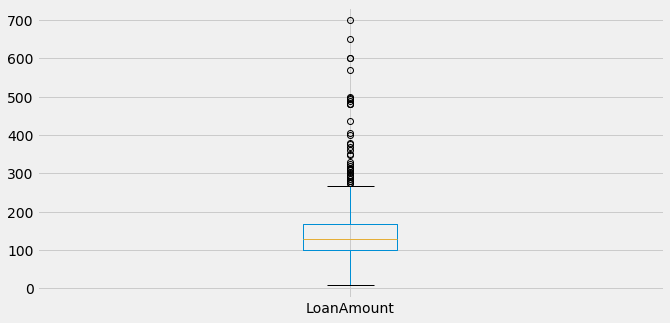

In [27]:
df["LoanAmount"].plot.box(figsize = (10, 5))
plt.show()

- There is also a large number of outliers

## Bivariate Analysis
### Categorical v/s Categorical
### Loan v/s Gender

In [28]:
cross = pd.crosstab(df["Gender"], df["Loan_Status"])

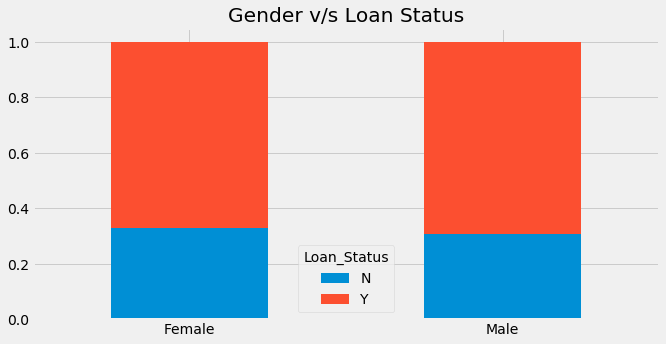

In [29]:
cross.div(cross.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5), title = "Gender v/s Loan Status")
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.show()

### Loan Status v/s Married

In [30]:
Married = pd.crosstab(df["Married"], df["Loan_Status"])

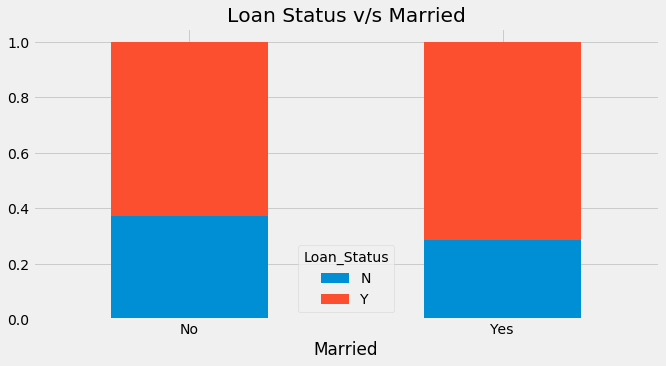

In [31]:
Married.div(Married.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10,5), title = "Loan Status v/s Married")
plt.xticks(rotation = 0)
plt.show()

- Inference = Married applicants have a higher proportion for loan acceptance

### Loan Status v/s Dependents

In [32]:
LoanStatus = pd.crosstab(df["Dependents"], df["Loan_Status"])

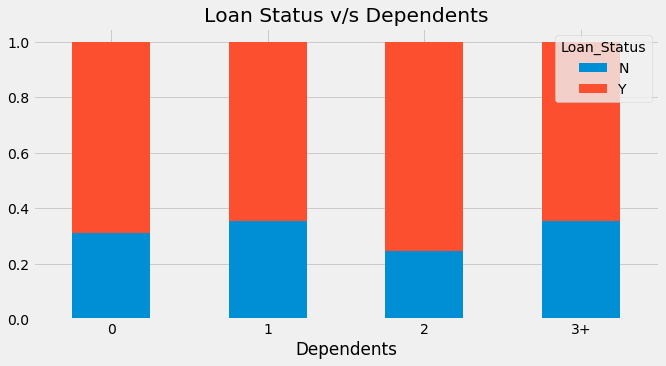

In [33]:
LoanStatus.div(LoanStatus.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Dependents")
plt.xticks(rotation = 0)
plt.show()

### Loan Status v/s Education

In [34]:
Education = pd.crosstab(df["Loan_Status"], df["Education"])

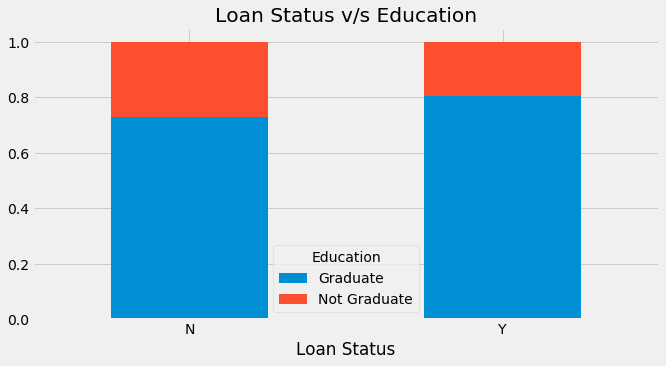

In [35]:
Education.div(Education.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xlabel("Loan Status")
plt.title("Loan Status v/s Education")
plt.xticks(rotation = 0)
plt.show()

- Inference = Graduated applicants have a higher proportion for loan acceptance

### Loan Status v/s Self Employed

In [36]:
SelfEmployed = pd.crosstab(df["Loan_Status"], df["Self_Employed"])

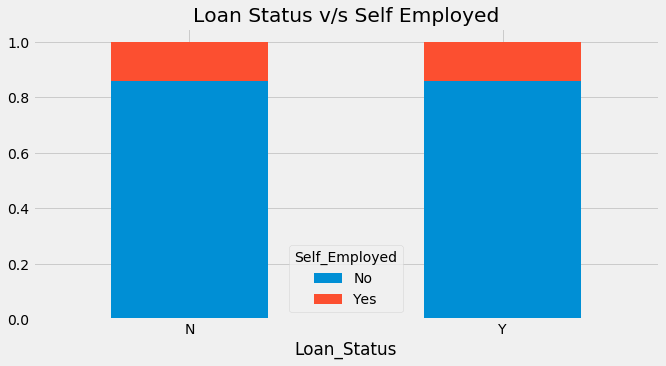

In [37]:
SelfEmployed.div(SelfEmployed.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Self Employed")
plt.xticks(rotation = 0)
plt.show()

- No inference can be made

### Credit History v/s Loan Status

In [38]:
CreditHistory = pd.crosstab(df["Credit_History"], df["Loan_Status"])

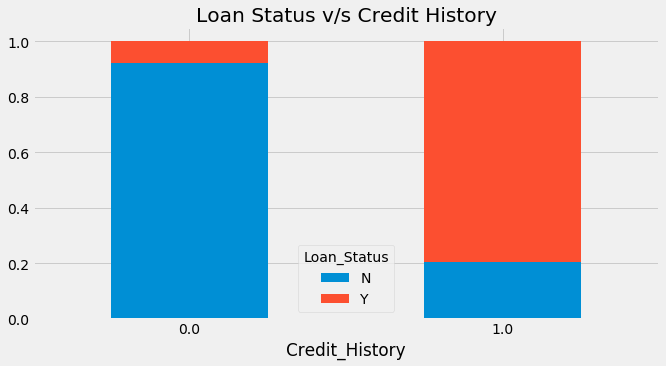

In [39]:
CreditHistory.div(CreditHistory.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Credit History")
plt.xticks(rotation = 0)
plt.show()

- Inference = People with good credit history are more likely to get a loan 

### Property Area v/s Loan Status

In [40]:
Property_Area = pd.crosstab(df["Property_Area"], df["Loan_Status"])

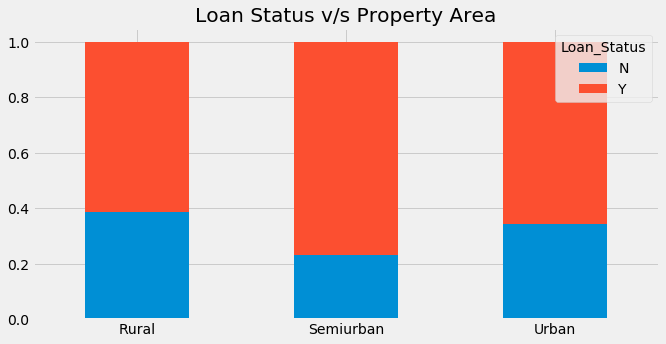

In [41]:
Property_Area.div(Property_Area.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Property Area")
plt.xlabel(None)
plt.show()

- Inference = Proportion of loans getting approved in semiurban area is higher than rural and urban areas

## Numerically Independent variable v/s Target Variable

In [42]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


### Applicant Income v/s Loan Status

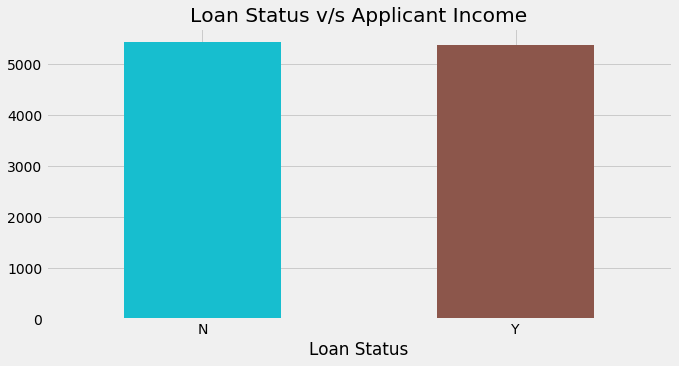

In [43]:
df.groupby('Loan_Status').mean()["ApplicantIncome"].plot.bar(color = ["tab:cyan", "tab:brown"], figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Applicant Income")
plt.xlabel("Loan Status")
plt.show()

-  We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
- Binning ApplicantIncome to get more insight

In [44]:
bins = [0, 2500, 4000, 6000, 81000]
group = ["low", "average", "high", "very_high"]

- Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [45]:
df['Income_bin'] = pd.cut(x = df["ApplicantIncome"], bins = bins, labels = group)

In [46]:
df['Income_bin'].head()

0       high
1       high
2    average
3    average
4       high
Name: Income_bin, dtype: category
Categories (4, object): ['low' < 'average' < 'high' < 'very_high']

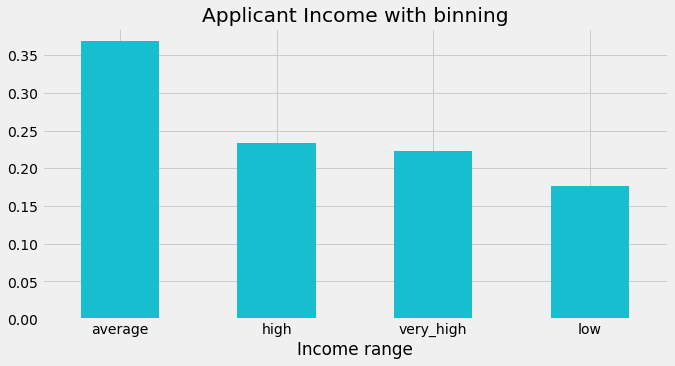

In [47]:
df['Income_bin'].value_counts(normalize = True).plot.bar(color = "tab:cyan", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Applicant Income with binning")
plt.xlabel("Income range")
plt.show()

### Binned income v/s Loan Status 

In [48]:
pd.crosstab(df["Income_bin"], df["Loan_Status"], normalize="index")

Loan_Status,N,Y
Income_bin,,
low,0.314815,0.685185
average,0.296460,0.703540
high,0.314685,0.685315
very_high,0.335766,0.664234


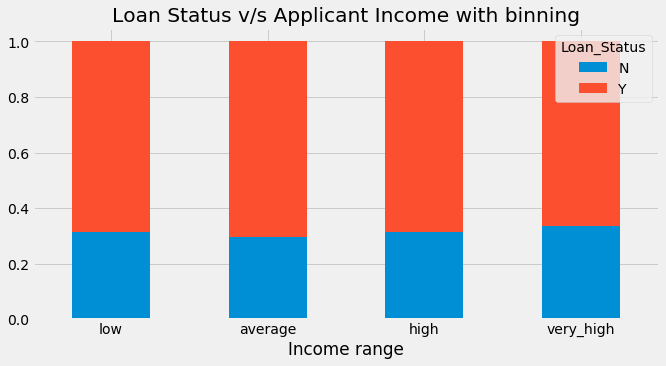

In [49]:
pd.crosstab(df["Income_bin"], df["Loan_Status"], normalize="index").plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Applicant Income with binning")
plt.xlabel("Income range")
plt.show()

- It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high

### Binning Coapplicant Income

In [50]:
bins = [0,1000, 4000, 42000]
labels = ["low", "average", "high"]

In [51]:
df["Coapplicant_Income_bin"] = pd.cut(df["CoapplicantIncome"], bins, labels = labels, include_lowest= True)

In [52]:
df["Coapplicant_Income_bin"].head()

0        low
1    average
2        low
3    average
4        low
Name: Coapplicant_Income_bin, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

### Coapplicant Income bin v/s Loan Status

In [53]:
Coapplicant_Income_bin = pd.crosstab(df["Coapplicant_Income_bin"], df["Loan_Status"])

In [54]:
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
low,99,196
average,74,190
high,19,36


In [55]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(axis = 1), axis = 0)

Loan_Status,N,Y
Coapplicant_Income_bin,,
low,0.335593,0.664407
average,0.280303,0.719697
high,0.345455,0.654545


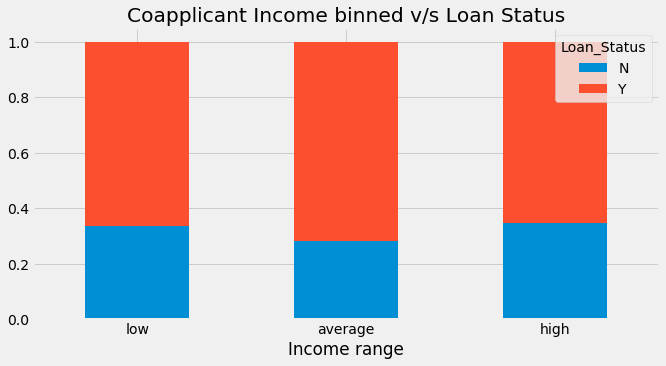

In [56]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Coapplicant Income binned v/s Loan Status")
plt.xlabel("Income range")
plt.show()

- People with low applicant Income having equal proportion of loan acceptance as people with high income applicant.This looks wrong.
- This may be because most of the people don't have a coapplicant.
- So total income = applicant income + coapplicant income may be a good feature.

### Total Income

In [57]:
df["total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [58]:
bins = [0, 2500, 4000, 6000, 81000]
groups = ["low", "average", "high", "very high"]

In [59]:
df["total_income_bin"] = pd.cut(df["total_income"], bins, labels = groups, include_lowest= True)

In [60]:
total_income_bin = pd.crosstab(df["total_income_bin"], df["Loan_Status"])

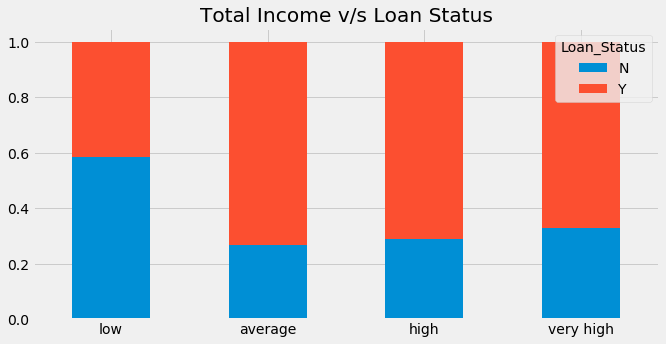

In [61]:
total_income_bin.div(total_income_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.title("Total Income v/s Loan Status")
plt.show()

- Now this relationship looks correct that people with low total income have low chances of loan approval

### Loan Amount

In [62]:
bins = [0, 100, 200, 700]
groups = ['low', 'average', 'high']

In [63]:
df['Loan_Amount_bin'] = pd.cut(df['LoanAmount'], bins, labels = groups)

In [64]:
Loan_Amount_bin = pd.crosstab(df['Loan_Amount_bin'], df['Loan_Status'])

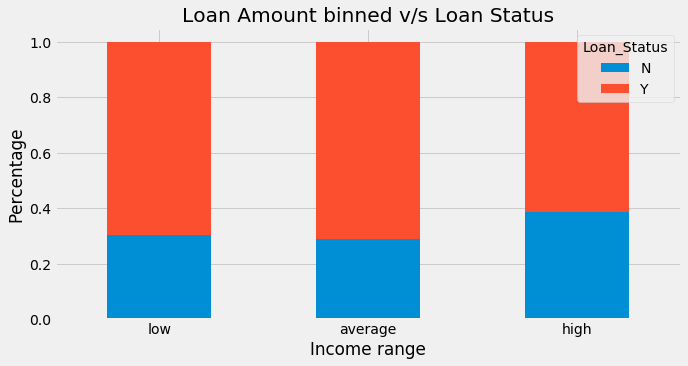

In [65]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.xlabel("Loan Amount Range")
plt.ylabel("Percentage")
plt.title("Loan Amount binned v/s Loan Status")
plt.xlabel("Income range")
plt.show()

- This supports our hypothesis that for less loan amount, chances of loan 
approval will be high

## Dropping extra features that we had made for exploratory analysis of dataset

In [66]:
df = df.drop(['Coapplicant_Income_bin', 'Income_bin', 'Loan_Amount_bin', 'total_income_bin', 'total_income'], axis = 1)

<h3>Most correlated variables</h3>


*   Loan Amount and Applicant Income
*   Loan Amount and Coapplicant Income
*   Credit History and Loan Status





## Missing Value Imputation

- After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance

In [67]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

Text(0.5, 1.0, 'Missing values')

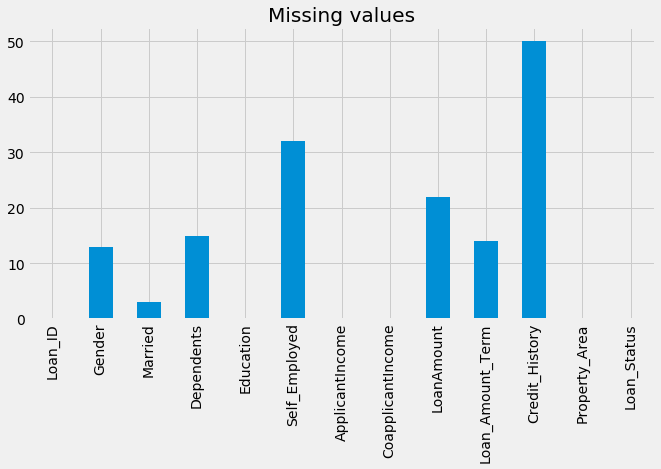

In [68]:
df.isnull().sum().plot.bar(figsize = (10, 5))
plt.title("Missing values")

- We can consider these methods to fill the missing values:

 1. For numerical variables: imputation using mean or median
 2. For categorical variables: imputation using mode

In [69]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace = True)

- Lets find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [70]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

- It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [71]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)

In [72]:
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace = True)

- We used median to fill the null values in Loan amount. As earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [73]:
df.isnull().sum().sum()

0

## Outlier treatment
- As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them.
- having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Text(0.5, 1.0, 'Loan Amount')

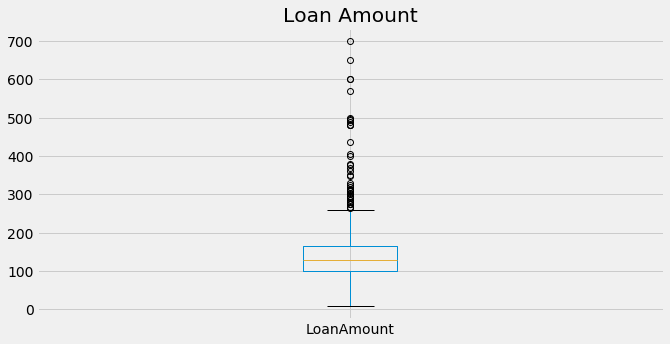

In [74]:
df["LoanAmount"].plot.box(figsize = (10, 5))
plt.title("Loan Amount")

- Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.
- One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [75]:
df["LoanAmount_log"] = np.log(df["LoanAmount"])

Text(0.5, 1.0, 'LoanAmount Transformed feature')

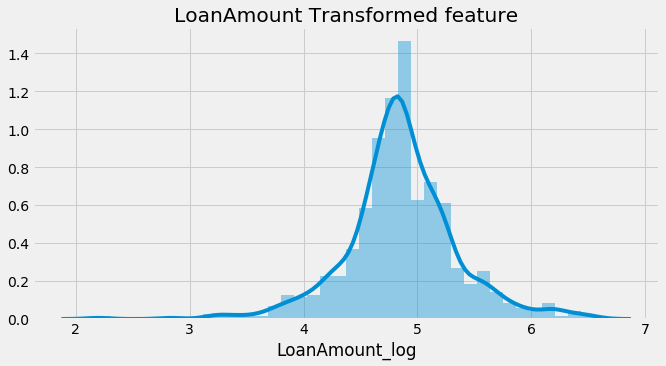

In [76]:
plt.figure(figsize = (10, 5))
sns.distplot(df["LoanAmount_log"])
plt.title("LoanAmount Transformed feature")

- Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## Model Building : Part 1
- Now we will apply logistic regression to this problem beacuse it is a classification problem.

In [77]:
# Dropping Loan ID because it is not an important feature for prediction
df = df.drop('Loan_ID', axis = 1)

### Doing one hot encoding
- Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. 

In [78]:
df['Married'] = pd.get_dummies(df['Married']).drop('No', axis = 1)
df['Education'] = pd.get_dummies(df['Education']).drop('Not Graduate', axis = 1)
df['Self_Employed'] = pd.get_dummies(df['Self_Employed']).drop('No', axis = 1)
df['Gender'] = pd.get_dummies(df['Gender']).drop('Female', axis = 1)

In [79]:
df['Dependents0'] = pd.get_dummies(df['Dependents'])['0']
df['Dependents1'] = pd.get_dummies(df['Dependents'])['1']
df['Dependents2'] = pd.get_dummies(df['Dependents'])['2']

In [80]:
df.drop('Dependents', 1, inplace = True)

In [81]:
df = pd.concat([pd.get_dummies(df['Property_Area']).drop('Urban', 1), df.drop('Property_Area', 1)], axis = 1)

In [82]:
# split the dependent and independent varibles
x = df.drop('Loan_Status', axis = 1)
y = df["Loan_Status"]

In [83]:
# split into train test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

## Training and evaluation of the model
### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
model = LogisticRegression(random_state = 4)
model.fit(x_train,y_train)

LogisticRegression(random_state=4)

 Accuracy on train

In [86]:
y_pred_train = model.predict(x_train)
accuracy_score(y_pred_train, y_train)*100

81.4663951120163

 Accuracy on test

In [87]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)*100

80.48780487804879

- Model has 80% accuracy

## Feature Engineering
- Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
 1. Total Income
 2. EMI
 3. Balance Income

### Total Income

In [88]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

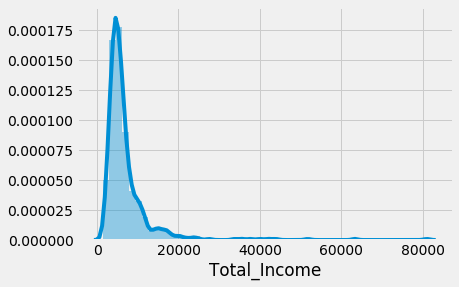

In [89]:
sns.distplot(df['Total_Income'])

- This distribution is right skewed. Making a log transformation will make it normal

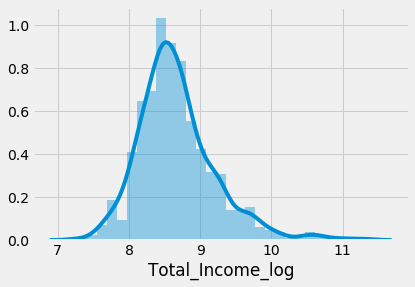

In [90]:
df['Total_Income_log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log'])

### EMI

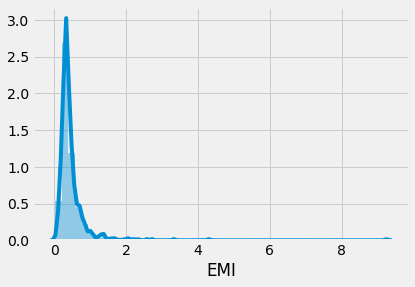

In [91]:
df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']
sns.distplot(df['EMI'])

### Balance_Income

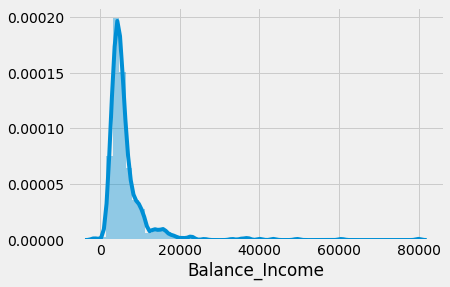

In [92]:
df['Balance_Income'] = df['Total_Income'] - (df['EMI']*1000)
sns.distplot(df['Balance_Income'])

- Now the features have become much correlated, so removing some features to reduce this correlation.

In [93]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

## Model Building: part 2
- After creating new features, we can continue the model building process. 

In [94]:
x = df.drop('Loan_Status', 1)
y = df['Loan_Status']

In [95]:
# split into train test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

### Logistic Regression

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [97]:
model1 = LogisticRegression(random_state = 4)
model1.fit(x_train,y_train)

LogisticRegression(random_state=4)

 Accuracy on train

In [98]:
y_pred_train1 = model1.predict(x_train)
accuracy_score(y_pred_train1, y_train)*100

81.05906313645622

Accuracy on test

In [99]:
y_pred_test = model1.predict(x_test)
accuracy_score(y_pred_test, y_test)*100

80.48780487804879

### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
model2 = DecisionTreeClassifier(random_state = 1)
model2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy on train

In [102]:
y_pred_train2 = model2.predict(x_train)
accuracy_score(y_pred_train2, y_train)*100

100.0

Accuracy on test

In [103]:
y_pred_test2 = model2.predict(x_test)
accuracy_score(y_pred_test2, y_test)*100

73.17073170731707

- Looks that decision tree has overfitted the data.

### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model3 = RandomForestClassifier(random_state = 1, max_depth = 10)
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

Accuracy on train

In [106]:
y_pred_train3 = model3.predict(x_train)
accuracy_score(y_pred_train3, y_train)*100

92.87169042769857

Accuracy on test

In [107]:
y_pred_test3 = model3.predict(x_test)
accuracy_score(y_pred_test3, y_test)*100

80.48780487804879

- This model also looks overfitted on the train set

### Conclusion
- We can infer that Logistic regression performs best without these new features